In [2]:
import numpy as np
import matplotlib.pyplot as plt

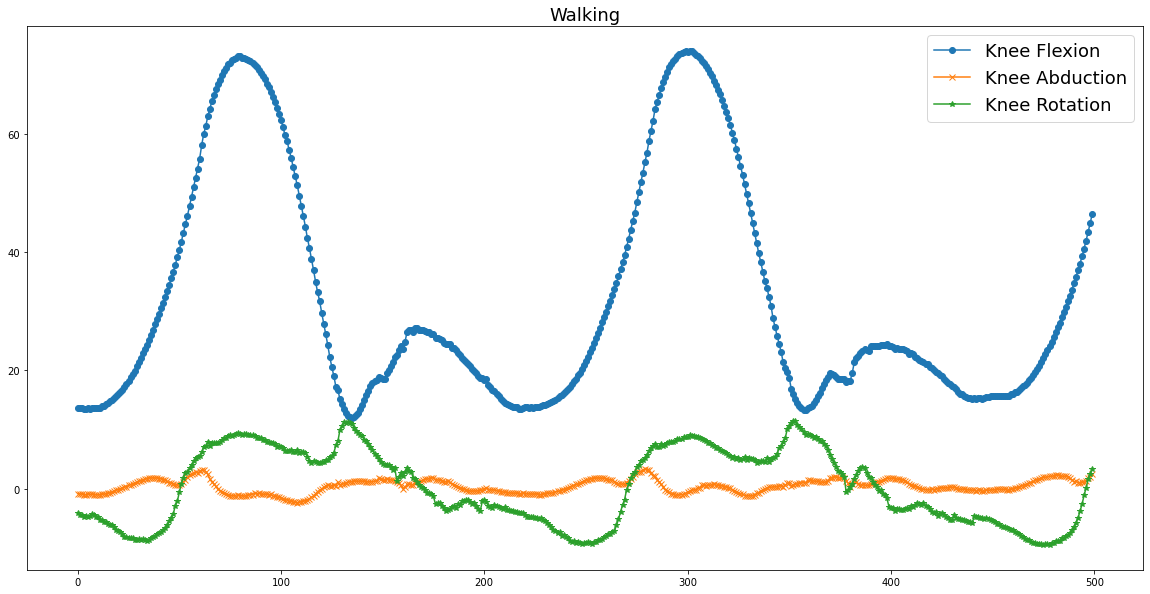

In [28]:
angles = np.load('knee_joint_angles.npy')

fig, ax = plt.subplots(figsize = (20,10))
plt.plot(180-angles[:500,0]*(180/np.pi),"-o",markersize = 6, label = 'Knee Flexion')
plt.plot(angles[:500,1]*(180/np.pi),"-x", markersize = 6, label = 'Knee Abduction')
plt.plot(angles[:500,2]*(180/np.pi),"-*", markersize = 6, label = 'Knee Rotation')
plt.title("Walking", fontsize = 18)
plt.legend(fontsize = 18)